# Milestone 1

### Dataset Details

#### Dataset 1:
Netflix movies and shows dataset from Kaggle - Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. This is CSV file downloaded from Kaggle.

#### Dataset 2:
IMDB's top 250 movie data using web scraping - IMDB ranks movies and given them score. This dataset is published on IMDB website that includes top 250 movies of all time according to them. using Python's Beatifulsoup library to webscrape and json parsing to get the information parsed out to build the dataset. There are 250 movie records.

#### Dataset 3:
Movie Torrents for top 100 monthly movies from Movies, TV, Music, Search, and, Download API -  Movie, TV, music search and download provides API connections to download torrent links for monthly top 100 movies, monthly top 100 tv shows, monthly top 100 music videos, monthly top 100 games torrent etc.

#### Dataset 4: 
Movie details using OMDB API - Getting movie details, actors, awards, DVD release date, Rating Scores from Rotten Tomatoes and IMDb, box office revenue etc. API returns 25 attributes about a movie. For 250 top movies from IMDB I am calling this API in loop to get details for every movie by passing movie name and the year of release. There are total 250 records.

### Relationship between datasets
Dataset-4 (OMDB) and dataset-2 (IMDB) we have "imdb id" to join on. 

Dataset-1 (Netflix) and Dataset-3 (Torrent) can be connected on movie title. Need to be careful here as Torrent dataset has more than one record per movie title. I am thinking to get that to one record per movie with an array of torrent links and count of torrents available as derived fields. Doing that grouping by movie titles will bring the Torremt dataset to same granularity level as that of Netflix dataset.

Above two resulting datasets can then be connected using "movie title" and "year". While doing join I will be careful about case of movie titles, any special characters or white spaces, format of year etc to make sure all our join conditions pass and get a corresponding row.

### Project Subject Area
Project is about analysing details of top movies in the US. Analysis that I am interested in are - 
1. Distribution of Domestic vs Foreign movies with respect to awards through time
2. Most popular genre of movies both domestic and foreign
3. Does box office revenue correlates with awards?
4. Popularity trend of shows vs movies on Netflix
5. Duration trend of movies through time - have movies been shorter through the time?
6. Popular movies by numbner of torrents created
7. Actors/Actresses by award counts through time

### What will it take to accomplish 5 final project milestones?
1. Data quality improvement - i.e. outlier detection and remediation, data formatting changes etc.
3. Data integration from different sources
4. Handling data granularity while joining different data sets together - This may need grouping certain datasets while creating aggregated metrics before joining it to other datasets.
5. Establishing connection to the chosen database / RDBMS.
6. Creating table(s) to store the data gathered.
7. Load the data into tables.
8. Create all thought about data visualizations and document the trends, observations etc.
9. Capture comments wherever applicable.
10. Have saved copies of all datasets at different stages including python scripts with glimpse into data, data base tables, visualizations in python scripts or any visualization tools.
11. Push all the changes to GIT repo, provide needed links etc during final submission.

### Ethical implications and challenges
Well, there is a lot of ethical implications that movies have on human mind, his/her development of thoughts, influencing changes in behavior etc. For e.g. some movies show violence in raw form which can leave one distressed and thinking about it for long time. In terms of project at hand any analysis is not an attemp to influence or provide guidance to watch certain types of movies but instead look at the trend and build understanding of this space with data.

As of now I do not see a lot of challenge with this project. Said that data needs to cleaned, integrated, and stored.

# Dataset 1: Netflix movies and shows

### Dataset description: 
About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Data Source:
Kaggle
https://www.kaggle.com/datasets/shivamb/netflix-shows

### Metadata:
1. show_id: Unique ID for every Movie / Tv Show (String)
2. type: Identifier - A Movie or TV Show (String)
3. title: Title of the Movie / Tv Show (String)
4. director: Director Name (String)
5. cast: Actors involved in the movie / show [comma separated] (String)
6. country: Country where the movie / show was produced (String)
7. date_added: Date it was added on Netflix (Date)
8. release_year: Actual Release year of the move / show (Number)
9. rating: TV Rating of the movie / show (String)
10. duration: Total Duration - in minutes or number of seasons (String)
11. listed_in: Genre (String)
12. description: The summary description (String)

In [3]:
import pandas as pd
# Read the downloaded data file into pandas dataframe
df_netflix = pd.read_csv("netflix_titles.csv")

In [4]:
# check the data 
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Dataset 2: Using webscraping to get movies and their ratings from IMDB website

### Dataset description:
IMDB ranks movies and given them score. This dataset is published on IMDB website that includes top 250 movies of all time according to them.

### Data Source:
https://www.imdb.com/chart/top

### Metadata:
1. rank: Rank as given by IMDB (number)
2. title: Title or name of the movie (String)
3. rating: Rating or score given to the movie (Float)
4. year: Release year of the movie (Number)
5. cast: Actors names in the movie separated by columns (String)

In [7]:
# import all needed libraries
import requests
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
from random import randint
import numpy as np
import seaborn as sns
import re

In [8]:
# Downloading imdb top 250 movie's data while web scraping
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]
 
 
 
# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"rank": place,
            "title": movie_title,
            "rating": ratings[index],
            "year": year,
            "cast": crew[index],
            }
    list.append(data)


# Read and store as a data frame
df_top_imdb_movies = pd.DataFrame(list)
df_top_imdb_movies.head()

,rank,title,rating,year,cast
0,1,The Shawshank Redemption,9.235922953517253,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155731243579053,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.992225912112428,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983771607470388,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953743134326016,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"


# Dataset 3: Get Monthly Top 100 Movies Torrents from Movie, TV, music search and download

### Dataset Description:
Movie, TV, music search and download provides API connections to download torrent links for monthly top 100 movies, 
monthly top 100 tv shows, monthly top 100 music videos, monthly top 100 games torrent etc.

### Data Source:
1. API link accessed through rapidapi - movie-tv-music-search-and-download.p.rapidapi.com

### Metadata:
1. Title - Title or Name of the movie (String)
2. Torrent - Torrent link (String)
3. Size - Torrent size (String)
4. Rank - Torrent Rank

In [9]:
import requests

url = "https://movie-tv-music-search-and-download.p.rapidapi.com/monthly_top100_movies"

headers = {
	"X-RapidAPI-Key": "36a03a312bmshec916da8f40801cp12d965jsn00140a4bcf30",
	"X-RapidAPI-Host": "movie-tv-music-search-and-download.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

In [10]:
# import json
import json

# load API calls response into a json object
response_json = json.loads(response.text)

# instantiate an empty list
list = []

# loop through each json result and parse response json to get title, torrent, and torrent size 
# for each parsed result keep appending into a list
for data in response_json['result']:
    title = (data['title'].split('(')[0]).encode('utf-8').decode('utf-8')
    title = title.split('2022')[0]
    title = (title.split('2023')[0]).strip()
    torrent = data['torrent']
    size = data['size']
    
    data = {"title": title,
            "torrent_link": torrent,
            "size_of_torrent_file": size
    }
    
    list.append(data)

In [11]:
# Read into a data frame
df_movies_torrent = pd.DataFrame(list)
df_movies_torrent.head()


,title,torrent_link,size_of_torrent_file
0,Scream VI,https://itorrents.org/torrent/60F9E088C92A7218...,2.31 GB
1,Shazam! Fury of the Gods,https://itorrents.org/torrent/C7BAD62F1380EFCD...,2.4 GB
2,Ghosted,https://itorrents.org/torrent/1088D0C525DB40ED...,2.16 GB
3,Creed III,https://itorrents.org/torrent/5E197437EC43CB71...,2.15 GB
4,65,https://itorrents.org/torrent/617806EA35799F16...,1.71 GB


# Dataset 4: Getting movie details, actors, awards, DVD release date, Rating Scores from Rotten Tomatoes and IMDb, box office revenue etc using OMDB API

### Dataset Description:
The OMDb API is a RESTful web service to obtain movie information.

### Data Source:
1. OMDB API accessed using python requests library - 'http://www.omdbapi.com/?apikey='+API_KEY+'&t='+title+'&y='+year

### Metadata:
1. Title - Title or Name of the movie (String)
2. Year - Movie release Year (Number)
3. Rated - PG rating (String)
4. Released - Release date (Date)
5. Runtime - run time (String)
6. Genre - Array of Genre (Array of Strings)
7. Director - Array of Names of Directors (Array of Strings)
8. Writer - Array of Names of writers (Array of Strings)
9. Actors - Array of Names of writers (Array of Strings)
10. Plot - plot/ story (String)
11. Language - release language (String)
12. Country - Release country (String)
13. Awards - Array of award strings (Array of strings)
14. Poster - Link to movie poster (String)
15. Ratings - Array of ratings from different sources (Array of strings / json). Can be parsed out into separate columns.
16. Metascore - Metascore (Number)
17. imdbRating - IMDB rating (float)
18. imdbVotes - votes on imdb (Number)
19. imdbID - unique imdbID (String)
20. Type - Movie or something else i.e. OTT, music video etc (String)
21. DVD - DVD release date (Date)
22. Box office - revenue (String)
23. Production - Production house (String)
24. Website - Website (String)
25. Response - Response (String)

In [12]:
# importing all required libraries
import requests
import pandas as pd

In [13]:
# omdb api key
API_KEY = "fcd8bac6"

In [14]:
# Testing the API for one movie and it's release year
title = 'Avatar'
year = '2009'

# Calling the API and storing json response
movieInfo = requests.get('http://www.omdbapi.com/?apikey='+API_KEY+'&t='+title+'&y='+year).json()
movieInfo

{'Title': 'Avatar',
 'Year': '2009',
 'Rated': 'PG-13',
 'Released': '18 Dec 2009',
 'Runtime': '162 min',
 'Genre': 'Action, Adventure, Fantasy',
 'Director': 'James Cameron',
 'Writer': 'James Cameron',
 'Actors': 'Sam Worthington, Zoe Saldana, Sigourney Weaver',
 'Plot': 'A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.',
 'Language': 'English, Spanish',
 'Country': 'United States',
 'Awards': 'Won 3 Oscars. 89 wins & 131 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BZDA0OGQxNTItMDZkMC00N2UyLTg3MzMtYTJmNjg3Nzk5MzRiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '82%'},
  {'Source': 'Metacritic', 'Value': '83/100'}],
 'Metascore': '83',
 'imdbRating': '7.9',
 'imdbVotes': '1,332,344',
 'imdbID': 'tt0499549',
 'Type': 'movie',
 'DVD': '22 Apr 

In [15]:
# For each imdb movie in it's top 250 list pull aditional details using above omdb api
list = []

for index, movie in df_top_imdb_movies.iterrows():
    title = movie['title']
    year = movie['year']
    # Call omdb api for each movie and it's release year to get additional info from omdb
    movieInfo = requests.get('http://www.omdbapi.com/?apikey='+API_KEY+'&t='+title+'&y='+year).json()
    
    # Append returned info in the list
    list.append(movieInfo)

In [16]:
# Read and store as a data frame
pd.set_option('display.max_columns', None)
df_omdb_movie_details = pd.DataFrame(list)
df_omdb_movie_details.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton","Over the course of several years, two convicts...",English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"[{'Source': 'Internet Movie Database', 'Value'...",82,9.3,"2,731,095",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",United States,Won 3 Oscars. 32 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,891,559",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 161 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,695,333",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True
3,The Godfather Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 21 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,290,581",tt0071562,movie,24 May 2005,"$47,834,595",N/A,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",The jury in a New York City murder trial is fr...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",97,9.0,"807,762",tt0050083,movie,04 Mar 2008,N/A,N/A,N/A,True


# Milestone 2
### Performing 5 transformations on the flat file data, in my case Netflix data or dataset 1

In [17]:
# Replace Headers
# Format data into a more readable format
# Identify outliers and bad data
# Find duplicates
# Fix casing or inconsistent values
# Conduct Fuzzy Matching

In [18]:
# check count of records
df_netflix.show_id.count()

8807

In [19]:
# check the data and count
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Transformation 1: As all my other datasets are movie datasets, I do not really need data for "TV Show". Filtering it out and keeping only Movie data.

In [20]:
# Keep only Movie data
df_netflix_movies = df_netflix[df_netflix['type']=='Movie']

# check the data
df_netflix_movies.show_id.count()

6131

In [21]:
# check unique values in Movie column to make sure it only has Movie data
df_netflix_movies['type'].unique()

array(['Movie'], dtype=object)

### Transformation 2: Derive is_long_movie if length of movie is more than 100 minutes then 1 else 0

In [22]:
df_netflix_movies['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [23]:
# Check if duration has Nan
print("The column Duration contains NaN - %r " % df_netflix_movies.duration.isnull().values.any())

The column Duration contains NaN - True 


In [24]:
# Suppress any warnings
import warnings
warnings.filterwarnings('ignore')

# Derive new field duration_2 as 0 duration is NaN/Null else numeric value (remove min and any whitespaces)
df_netflix_movies['duration_2'] = np.where(df_netflix_movies['duration'].isnull(), 0, ((df_netflix_movies['duration'].str.replace('min','')).str.strip()))

# Convert to numeric
df_netflix_movies['duration_2'] = pd.to_numeric(df_netflix_movies['duration_2'])

# Check data
df_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [25]:
# derive new field is_lengthy_movie, to be 1 if length of movie is > 100 minutes else 0
df_netflix_movies['is_lengthy_movie'] = np.where(df_netflix_movies['duration_2'] > 100, 1, 0)

# check data again
df_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2,is_lengthy_movie
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,1


### Transformation 3: Join data sets together. Join Netflix and Torrent datasets together. Keeping Netflix dataset as driving table 

In [26]:
# Joining Netflix data to Movie Torrent data
# Considering Netflix data as driving data i.e. left joining torrent data to Netflix data

# Converting all movie titles to lower case and free of whitespaces, prepping join key column
df_movies_torrent['title'] = (df_movies_torrent['title'].str.lower()).str.strip()
df_netflix_movies['title'] = (df_netflix_movies['title'].str.lower()).str.strip()

# merge or left join on key "title"
df_joined_1 = pd.merge(df_netflix_movies, df_movies_torrent, how="left", on=["title"])

### Transform 4: Check duplicates after join. Check if there is increase in count of records in before and after dataframes

In [27]:
# check the count of records before and after
df_netflix_movies['title'].count()

6131

In [28]:
df_joined_1['title'].count()

6131

In [96]:
# As counts are same we can assume safely that there are no duplicates. Check to see if there was anything that was successfully joined. 

In [29]:
# check how many records have column "torrent_link as not null" as that comes from torrent data set.
df_joined_1[~df_joined_1['torrent_link'].isnull()].count()
# As there are no records that had torrent_link column as not null we did not get any join at all.
# Did spot check by selecting title names from driving netflix dataset and checking it in torrent dataset and clearly can see that there are differences 
# and thus they were not joined. Also, torrent dataset seems to have lot of dupes i.e. records for the same movie with different torrent links.

show_id                 0
type                    0
title                   0
director                0
cast                    0
country                 0
date_added              0
release_year            0
rating                  0
duration                0
listed_in               0
description             0
duration_2              0
is_lengthy_movie        0
torrent_link            0
size_of_torrent_file    0
dtype: int64

In [30]:
# spot check the data between Netflix and teh Torrent datasets
# df_joined_1.head()
df_movies_torrent['title'].head(50)

0                            scream vi
1             shazam! fury of the gods
2                              ghosted
3                            creed iii
4                                   65
5                            scream vi
6           the super mario bros movie
7             shazam! fury of the gods
8                               tetris
9                            creed iii
10    ant-man and the wasp quantumania
11                                  65
12                    murder mystery 2
13             avatar the way of water
14                      evil dead rise
15                            breakout
16                            breakout
17    ant-man and the wasp quantumania
18                             ghosted
19                              assass
20                           scream vi
21             shazam fury of the gods
22                           scream vi
23            shazam! fury of the gods
24                       last sentinel
25                 peter 

In [31]:
df_netflix_movies[df_netflix_movies['title'].str.contains('avatar')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2,is_lengthy_movie


In [32]:
df_netflix_movies[df_netflix_movies['title'].str.contains('gods')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2,is_lengthy_movie
1080,s1081,Movie,new gods: nezha reborn,Zhao Ji,"Yang Tianxiang, Zhang He, Xuan Xiaoming, Li Sh...",China,"April 12, 2021",2021,TV-14,118 min,"Action & Adventure, Anime Features, Internatio...",While living as an ordinary deliveryman and mo...,118,1


### Transform 5: Check data availability. Check how many records do not cast or director information

In [33]:
# Out of 6K records 188 do not have director info
df_joined_1[df_joined_1['director'].isnull()].count()

show_id                 188
type                    188
title                   188
director                  0
cast                    134
country                 129
date_added              188
release_year            188
rating                  187
duration                188
listed_in               188
description             188
duration_2              188
is_lengthy_movie        188
torrent_link              0
size_of_torrent_file      0
dtype: int64

In [34]:
# Out of 6K records 475 records do not have any cast info
df_joined_1[df_joined_1['cast'].isnull()].count()

show_id                 475
type                    475
title                   475
director                421
cast                      0
country                 410
date_added              475
release_year            475
rating                  475
duration                475
listed_in               475
description             475
duration_2              475
is_lengthy_movie        475
torrent_link              0
size_of_torrent_file      0
dtype: int64

In [35]:
# It will safe to filter above records out to have better data availability for analysis
df_joined_1 = df_joined_1[~df_joined_1['cast'].isnull()]
df_joined_1['title'].count()

5656

In [36]:
df_joined_1 = df_joined_1[~df_joined_1['director'].isnull()]
df_joined_1['title'].count()

df_joined_1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2,is_lengthy_movie,torrent_link,size_of_torrent_file
1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,0,NaN,NaN
2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,1,NaN,NaN
3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,1,NaN,NaN
4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,1,NaN,NaN
5,s14,Movie,confessions of an invisible girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91,0,NaN,NaN


In [37]:
# checking info about the dataset so far
df_joined_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5522 entries, 1 to 6130
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   show_id               5522 non-null   object
 1   type                  5522 non-null   object
 2   title                 5522 non-null   object
 3   director              5522 non-null   object
 4   cast                  5522 non-null   object
 5   country               5189 non-null   object
 6   date_added            5522 non-null   object
 7   release_year          5522 non-null   int64 
 8   rating                5521 non-null   object
 9   duration              5519 non-null   object
 10  listed_in             5522 non-null   object
 11  description           5522 non-null   object
 12  duration_2            5522 non-null   int64 
 13  is_lengthy_movie      5522 non-null   int64 
 14  torrent_link          0 non-null      object
 15  size_of_torrent_file  0 non-null      

In [38]:
# See missing values in all columns
df_joined_1.isnull().sum()

show_id                    0
type                       0
title                      0
director                   0
cast                       0
country                  333
date_added                 0
release_year               0
rating                     1
duration                   3
listed_in                  0
description                0
duration_2                 0
is_lengthy_movie           0
torrent_link            5522
size_of_torrent_file    5522
dtype: int64

# Milestone 3
### Cleaning / Formatting website data
Perform at least 5 data transformation and/or cleansing steps to your website data. Any of below or something else.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [40]:
# checking the data 
df_top_imdb_movies.head()

,rank,title,rating,year,cast
0,1,The Shawshank Redemption,9.235922953517253,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155731243579053,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.992225912112428,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983771607470388,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953743134326016,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"


In [44]:
# check data for not nulls
df_top_imdb_movies.info()
# All 250 records have data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    250 non-null    object
 1   title   250 non-null    object
 2   rating  250 non-null    object
 3   year    250 non-null    object
 4   cast    250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


### Transformation 1: Renaming headers

In [47]:
# rename header columns
df_top_imdb_movies.rename(
    columns={"rank": "imdb_rank", "title": "movie_name", "rating": "imdb_rating", "cast":"movie_cast", "year":"movie_release_year"},
    inplace=True,
)

In [48]:
# check data 
df_top_imdb_movies.head()

,imdb_rank,movie_name,imdb_rating,movie_release_year,movie_cast
0,1,The Shawshank Redemption,9.235922953517253,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155731243579053,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.992225912112428,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983771607470388,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953743134326016,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"


### Transformation 2: Format data into more readable format

In [49]:
# There is a possibility to transform movie_cast a data a little bit to bring out director name into separate column
df_top_imdb_movies['movie_cast'].head()

0    Frank Darabont (dir.), Tim Robbins, Morgan Fre...
1    Francis Ford Coppola (dir.), Marlon Brando, Al...
2    Christopher Nolan (dir.), Christian Bale, Heat...
3    Francis Ford Coppola (dir.), Al Pacino, Robert...
4        Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb
Name: movie_cast, dtype: object

In [54]:
# Deriving the director name from movie_cast
df_top_imdb_movies['director_name'] = df_top_imdb_movies['movie_cast'].str.split('(').str[0]

In [55]:
# check data
df_top_imdb_movies.head()

,imdb_rank,movie_name,imdb_rating,movie_release_year,movie_cast,director_name
0,1,The Shawshank Redemption,9.235922953517253,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",Frank Darabont
1,2,The Godfather,9.155731243579053,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",Francis Ford Coppola
2,3,The Dark Knight,8.992225912112428,2008,"Christopher Nolan (dir.), Christian Bale, Heat...",Christopher Nolan
3,4,The Godfather Part II,8.983771607470388,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert...",Francis Ford Coppola
4,5,12 Angry Men,8.953743134326016,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",Sidney Lumet


In [66]:
# Keeping everything in movie_cast except director name
df_top_imdb_movies['movie_cast'] = df_top_imdb_movies['movie_cast'].str.split(",").str[1:]

In [67]:
# check data again
df_top_imdb_movies.head()

,imdb_rank,movie_name,imdb_rating,movie_release_year,movie_cast,director_name
0,1,The Shawshank Redemption,9.235922953517253,1994,"[ Tim Robbins, Morgan Freeman]",Frank Darabont
1,2,The Godfather,9.155731243579053,1972,"[ Marlon Brando, Al Pacino]",Francis Ford Coppola
2,3,The Dark Knight,8.992225912112428,2008,"[ Christian Bale, Heath Ledger]",Christopher Nolan
3,4,The Godfather Part II,8.983771607470388,1974,"[ Al Pacino, Robert De Niro]",Francis Ford Coppola
4,5,12 Angry Men,8.953743134326016,1957,"[ Henry Fonda, Lee J. Cobb]",Sidney Lumet


### Transform 3: Identify outliers

<AxesSubplot:xlabel='imdb_rating'>

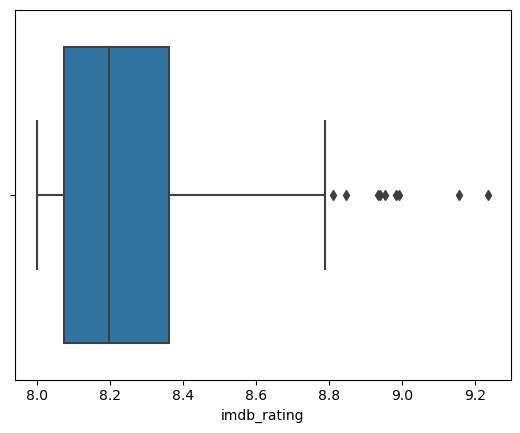

In [75]:
# using box plot on imdb ratings

import seaborn as sns
sns.boxplot(df_top_imdb_movies['imdb_rating'].astype(float))

# Observation - we can see that majority of teh movies have 8.2 rating while most of them have ratings between 8 amd 8.8 
# except very few above 8.8
# Not looking to remove outliers currently just identifying them

In [79]:
# using Z score to identify outliers
# Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. 
# And after setting up a threshold value one can utilize z score values of data points to define the outliers.
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df_top_imdb_movies['imdb_rating'].astype(float)))
print(z)

# Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation 
# (using Gaussian Distribution approach).

0      4.236353
1      3.890625
2      3.185709
3      3.149260
4      3.019799
         ...   
245    1.065083
246    1.066559
247    1.076508
248    1.082742
249    1.083704
Name: imdb_rating, Length: 250, dtype: float64


In [81]:
# Let's check how many values are there with value > +3
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([0, 1, 2, 3, 4]),)


### Transform 4: Identify outliers

In [84]:
# Finding duplicates
# occurrence based on movie_name
duplicate = df_top_imdb_movies[df_top_imdb_movies['movie_name'].duplicated()]
 
print("Duplicate Movies :")
 
# Print the resultant Dataframe
duplicate

# There are no duplicate movies by movie names

Duplicate Movies :


,imdb_rank,movie_name,imdb_rating,movie_release_year,movie_cast,director_name


### Transform 5: Joining this dataset to final dataset from Milestone 2

In [88]:
# Check Milestone 2 final dataset
df_joined_1.head()

# Movie titles are lower case and thus will have convert movie names into lower case for our imdb top movies dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2,is_lengthy_movie,torrent_link,size_of_torrent_file
1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,0,NaN,NaN
2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,1,NaN,NaN
3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,1,NaN,NaN
4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,1,NaN,NaN
5,s14,Movie,confessions of an invisible girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91,0,NaN,NaN


In [90]:
# Changing the movie_name column to all lowercase values
df_top_imdb_movies['movie_name'] = df_top_imdb_movies['movie_name'].str.lower()

In [92]:
# check data
df_top_imdb_movies.head()

,imdb_rank,movie_name,imdb_rating,movie_release_year,movie_cast,director_name
0,1,the shawshank redemption,9.235922953517253,1994,"[ Tim Robbins, Morgan Freeman]",Frank Darabont
1,2,the godfather,9.155731243579053,1972,"[ Marlon Brando, Al Pacino]",Francis Ford Coppola
2,3,the dark knight,8.992225912112428,2008,"[ Christian Bale, Heath Ledger]",Christopher Nolan
3,4,the godfather part ii,8.983771607470388,1974,"[ Al Pacino, Robert De Niro]",Francis Ford Coppola
4,5,12 angry men,8.953743134326016,1957,"[ Henry Fonda, Lee J. Cobb]",Sidney Lumet


In [94]:
# converting release year to int in both data frames
df_joined_1['release_year']=df_joined_1['release_year'].astype(int)
df_top_imdb_movies['movie_release_year']=df_top_imdb_movies['movie_release_year'].astype(int)

# join milestone 2 and imdb top 250 movie datasets on movie name and movie release year
df_joined_2 = pd.merge(df_joined_1, df_top_imdb_movies, how="left", left_on=['title','release_year'], right_on = ['movie_name','movie_release_year'])



In [97]:
# check data in the joined dataset which has values from imdb datasets as not null
df_joined_2[~df_joined_2['imdb_rating'].isnull()]

# We did get some joins successfully. Awesome !!

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_2,is_lengthy_movie,torrent_link,size_of_torrent_file,imdb_rank,movie_name,imdb_rating,movie_release_year,movie_cast,director_name
17,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,124,1,NaN,NaN,205,jaws,8.06018157325298,1975.0,"[ Roy Scheider, Robert Shaw]",Steven Spielberg
96,s167,Movie,once upon a time in america,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States","September 1, 2021",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229,1,NaN,NaN,80,once upon a time in america,8.29390383201909,1984.0,"[ Robert De Niro, James Woods]",Sergio Leone
190,s330,Movie,catch me if you can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,142,1,NaN,NaN,172,catch me if you can,8.092210879913504,2002.0,"[ Leonardo DiCaprio, Tom Hanks]",Steven Spielberg
198,s341,Movie,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,148,1,NaN,NaN,14,inception,8.73254457521228,2010.0,"[ Leonardo DiCaprio, Joseph Gordon-Levitt]",Christopher Nolan
233,s393,Movie,django unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",United States,"July 24, 2021",2012,R,165 min,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed...",165,1,NaN,NaN,55,django unchained,8.40989889319566,2012.0,"[ Jamie Foxx, Christoph Waltz]",Quentin Tarantino
467,s800,Movie,million dollar baby,Clint Eastwood,"Clint Eastwood, Hilary Swank, Morgan Freeman, ...",United States,"June 2, 2021",2004,PG-13,133 min,"Dramas, Sports Movies",When a cantankerous trainer mentors a persiste...,133,1,NaN,NaN,174,million dollar baby,8.088346909445233,2004.0,"[ Hilary Swank, Clint Eastwood]",Clint Eastwood
550,s934,Movie,hachi: a dog's tale,Lasse Hallström,"Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...","United Kingdom, United States","May 1, 2021",2009,G,93 min,"Children & Family Movies, Dramas","When his master dies, a loyal pooch named Hach...",93,0,NaN,NaN,233,hachi: a dog's tale,8.022024775099696,2009.0,"[ Richard Gere, Joan Allen]",Lasse Hallström
627,s1034,Movie,rush,Ron Howard,"Chris Hemsworth, Daniel Brühl, Olivia Wilde, A...","United Kingdom, Germany, United States","April 16, 2021",2013,R,123 min,"Action & Adventure, Dramas, International Movies","In the 1970s, a rivalry propels race car drive...",123,1,NaN,NaN,219,rush,8.034930299251187,2013.0,"[ Daniel Brühl, Chris Hemsworth]",Ron Howard
671,s1115,Movie,3 idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"April 1, 2021",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...,164,1,NaN,NaN,84,3 idiots,8.274881373203117,2009.0,"[ Aamir Khan, Madhavan]",Rajkumar Hirani
689,s1139,Movie,the pianist,Roman Polański,"Adrien Brody, Thomas Kretschmann, Frank Finlay...","United Kingdom, France, Poland, Germany, Unite...","April 1, 2021",2002,R,149 min,"Dramas, Independent Movies, International Movies",Famed Polish pianist Wladyslaw Szpilman strugg...,149,1,NaN,NaN,32,the pianist,8.508058268549265,2002.0,"[ Adrien Brody, Thomas Kretschmann]",Roman Polanski
